# Day 1: Room minimizer

### Problem:

Hi, I'm ÉléonORe, and I'm struggling to organize a series of events...

Each event requires a dedicated room.

Some events have overlapping participants, so I can't schedule them in the same room at the same time.

How many rooms do I need? How can I assign each event to a room so that no two overlapping events are scheduled in the same one?

Ideally, I want to minimize the total number of rooms used.

Can you help me solve this problem?

In instance.txt we can find an instance of the problem.

### Solution:

The aim of this problem is to minimize the number of rooms we have to use to not schedule them in the same room at same time. In the file instance.txt we have the events which lead to problems, i.e., there are some events that can't be overlappend in time and space.

Suppose we have $N$ events and the adjacency matrix $A$ tells us which events can not be in the same place at the same time. We want to minimize the number of rooms $M$ in order to not overlap events which can not be overlapped.

This problem is an example of a Graph Coloring problem, where we have $N$ nodes and we want to minimize the number of colors to use in the graph where the adjacent nodes can not be coloured with the same color.

To start with this problem, we firstly print the graph for the available instance, where there are available 100 different events (Nodes) and 2487 conflicts between events (Edges). We have to take into account that our graph is an undirected graph, since if there exists a conflict between event $i$ and event $j$, this conflict will be appear in the reverse way.

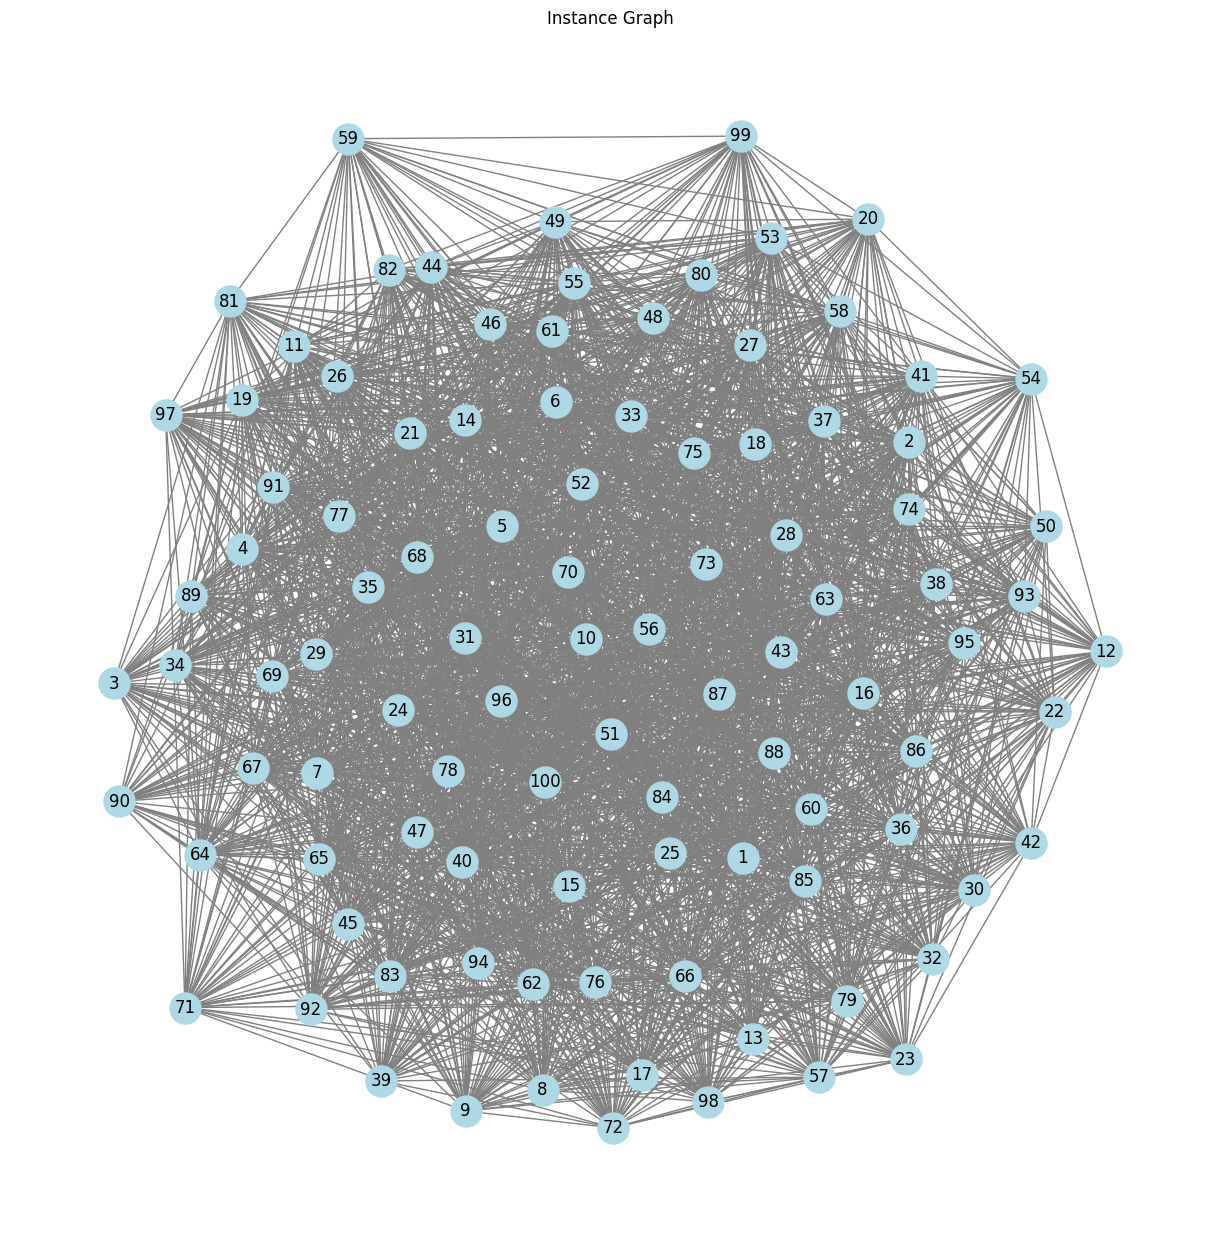

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# File path to the instance.txt file
file_path = "instance.txt"

# Create an empty graph
G = nx.Graph()

# Read the instance file and parse the data
with open(file_path, "r") as file:
    lines = file.readlines()
    # Process only lines starting with 'e'
    for line in lines:
        if line.startswith("e"):
            _, u, v = line.split()  # Split the line to extract the nodes
            G.add_edge(int(u), int(v))  # Add an edge to the graph

# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
plt.title("Instance Graph")
plt.show()

In [2]:
from utils import greedy_coloring

# Use the greedy coloring algorithm 
coloring, reverse_coloring = greedy_coloring(G)

# Print the coloring result
print("Graph Coloring:", coloring)
print("Number of Colors Used:", max(coloring.values()))

Graph Coloring: {1: 0, 5: 1, 7: 1, 9: 2, 10: 3, 11: 4, 12: 1, 13: 4, 14: 1, 15: 2, 16: 5, 18: 3, 19: 2, 22: 2, 25: 4, 27: 6, 28: 7, 30: 1, 31: 3, 32: 5, 33: 2, 35: 5, 36: 4, 37: 6, 39: 8, 40: 6, 41: 8, 42: 7, 45: 7, 46: 4, 47: 9, 51: 2, 53: 9, 54: 10, 55: 9, 58: 7, 59: 1, 60: 11, 62: 3, 63: 10, 65: 5, 69: 11, 70: 6, 71: 4, 72: 12, 75: 5, 81: 10, 84: 12, 87: 13, 88: 11, 89: 8, 91: 10, 93: 14, 95: 14, 96: 9, 98: 8, 2: 0, 3: 12, 6: 12, 17: 15, 20: 6, 21: 13, 23: 10, 26: 5, 34: 11, 43: 16, 44: 15, 48: 11, 49: 11, 50: 15, 52: 17, 56: 3, 57: 9, 66: 11, 82: 8, 83: 14, 85: 8, 86: 18, 100: 16, 4: 0, 24: 10, 61: 0, 64: 6, 68: 16, 76: 3, 77: 17, 78: 0, 80: 13, 92: 18, 94: 15, 29: 13, 73: 18, 74: 15, 79: 19, 97: 14, 67: 12, 8: 14, 38: 3, 90: 17, 99: 18}
Number of Colors Used: 19


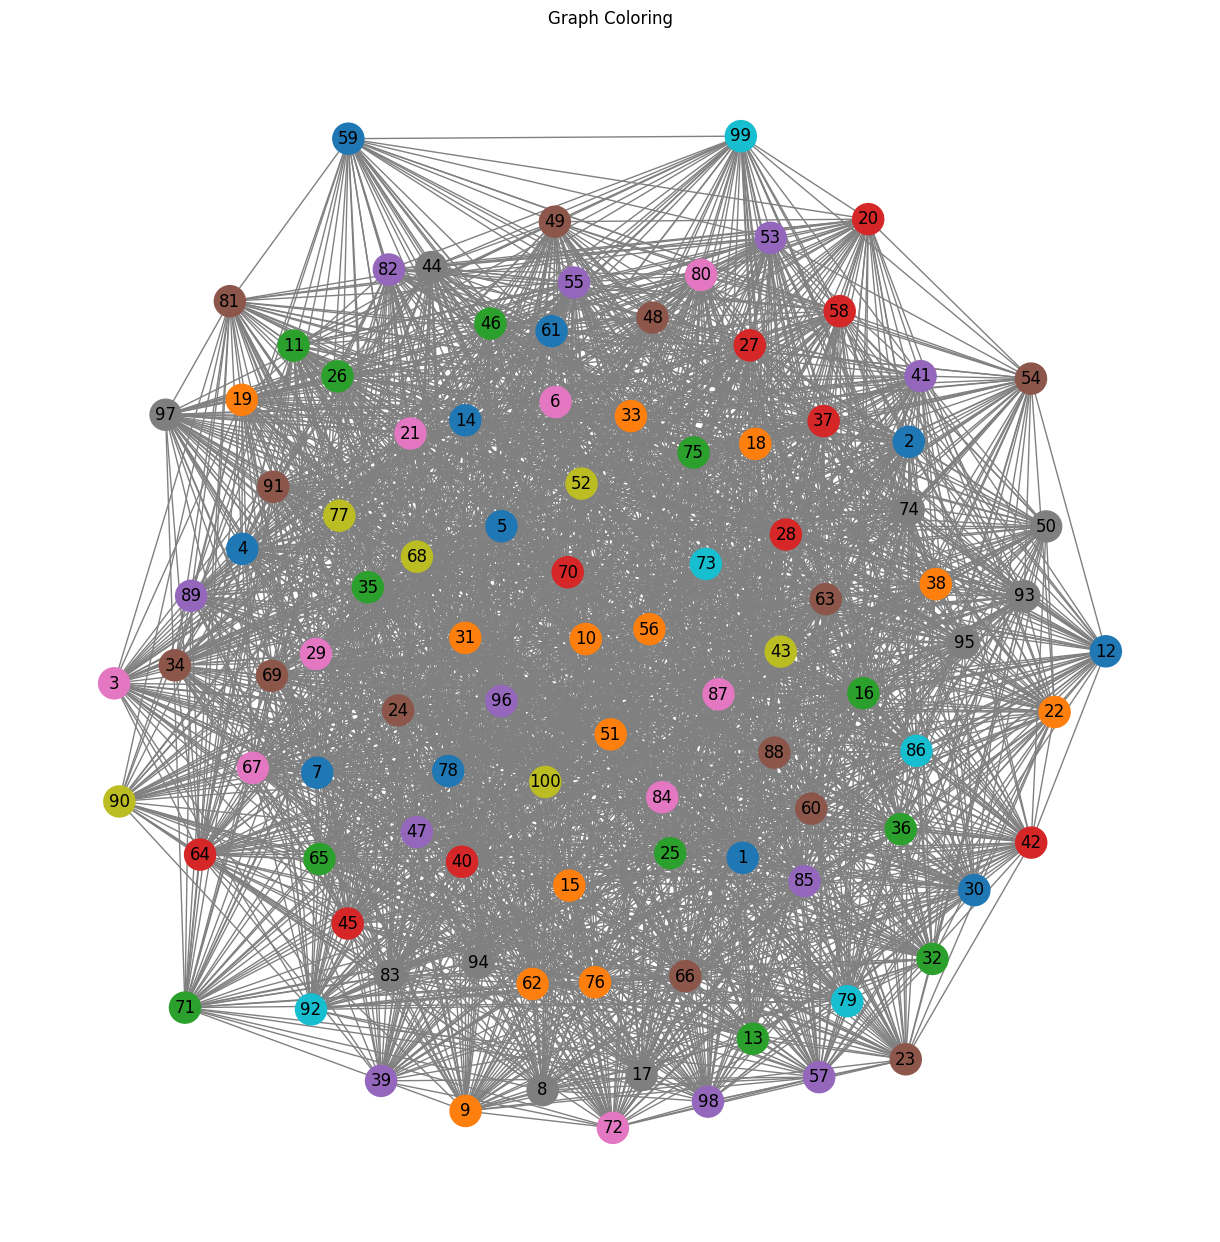

In [3]:
# Plot the graph with colored nodes
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better visualization
colors = [coloring[node] for node in G.nodes()]
nx.draw(
    G, pos, with_labels=True, node_size=500, node_color=colors, cmap=plt.cm.tab10, edge_color="gray"
)
plt.title("Graph Coloring")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7520\3802924694.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", len(reverse_coloring))


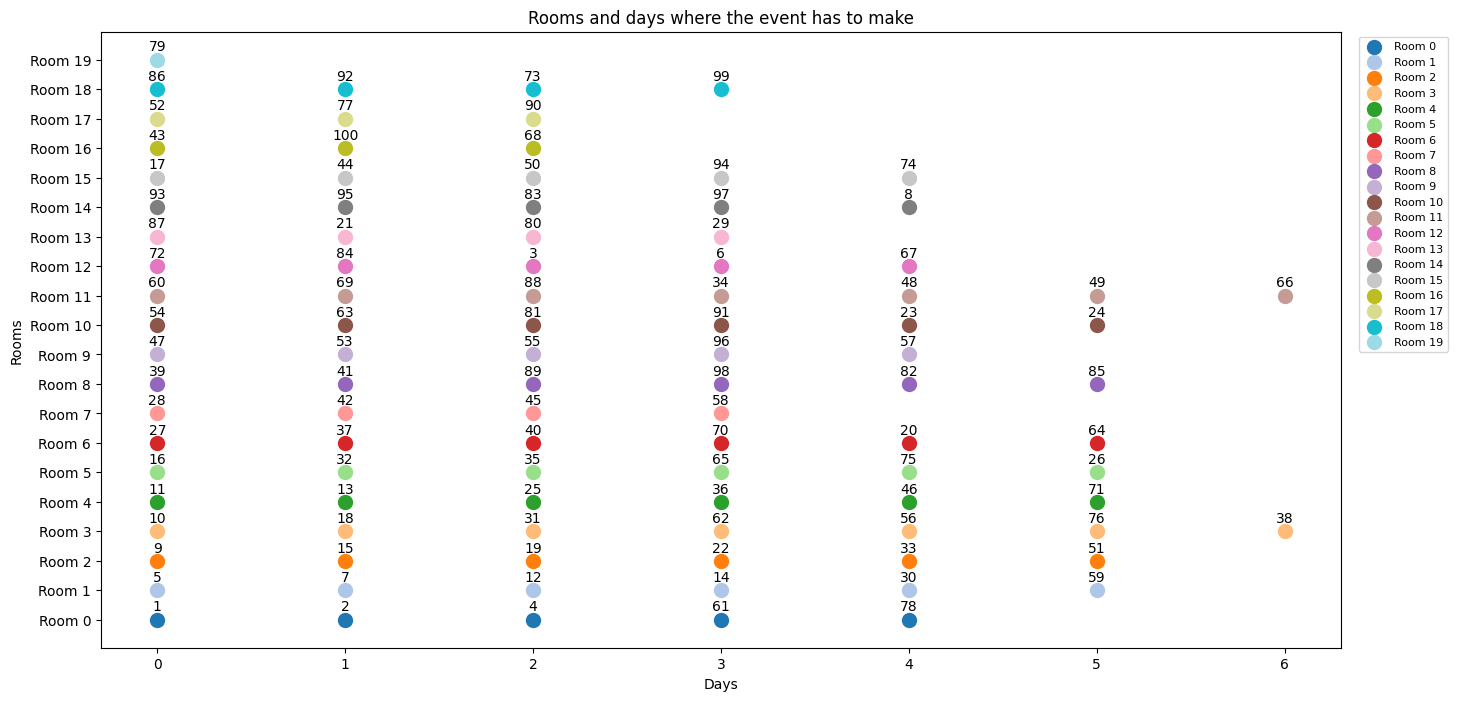

In [6]:
import matplotlib.cm as cm

colors = cm.get_cmap("tab20", len(reverse_coloring))

plt.figure(figsize=(16, 8))

for idx, (color, nodes) in enumerate(reverse_coloring.items()):
    
    x = range(len(nodes))
    y = [color] * len(nodes)
    plt.scatter(x, y, label=f"Room {color}", s = 100, color=colors(idx))
    for i, node in enumerate(nodes):
        plt.text(x[i], y[i]+0.3, f"{node}", ha="center")
plt.xlabel("Days")
plt.ylabel("Rooms")
plt.yticks(ticks=list(reverse_coloring.keys()),  # Positions
           labels=[f"Room {color}" for color in reverse_coloring.keys()],  # Labels
           fontsize=10)
plt.title("Rooms and days where the event has to make")
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=8)
plt.show()

There are more possibilities to solve this problem using different graph coloring algorithms.